In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

<a id="Overview the Data Set"></a> <br>
# Overview the Data Set
* We will use "sign language digits data set" for this tutorial.
* In this data there are 2062 sign language digits images.
* As you know digits are from 0 to 9. Therefore there are 10 unique sign.
* At the beginning of tutorial we will use only sign 0 and 1 for simplicity.
* In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
* Also sign one is between indexes 822 and 1027. Number of one sign is 206. Therefore, we will use 205 samples from each classes(labels).
* Note: Actually 205 sample is very very very little for deep learning. But this is tutorial so it does not matter so much.
* Lets prepare our X and Y arrays. X is image array (zero and one signs) and Y is label array (0 and 1).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

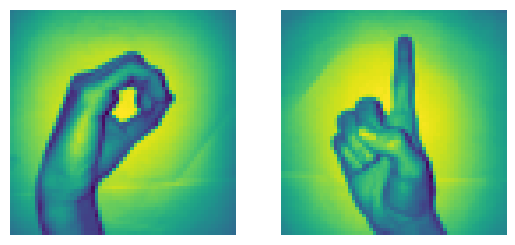

In [ ]:
# load data set
x_l = np.load('/content/drive/MyDrive/A_doc_imp/A_Udeyme/A_Python_and_Pytorch_for_generative_AI/Pytorch/data/X.npy')
Y_l = np.load('/content/drive/MyDrive/A_doc_imp/A_Udeyme/A_Python_and_Pytorch_for_generative_AI/Pytorch/data/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

* In order to create image array, I concatenate zero sign and one sign arrays
* Then I create label array 0 for zero sign images and 1 for one sign images.

In [ ]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* The shape of the X is (410, 64, 64)
    * 410 means that we have 410 images (zero and one signs)
    * 64 means that our image size is 64x64 (64x64 pixels)
* The shape of the Y is (410,1)
    *  410 means that we have 410 labels (0 and 1)
* Lets split X and Y into train and test sets.
    * test_size = percentage of test size. test = 15% and train = 75%
    * random_state = use same seed while randomizing. It means that if we call train_test_split repeatedly, it always creates same train and test distribution because we have same random_state.

In [ ]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

* Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).


In [ ]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* As you can see, we have 348 images and each image has 4096 pixels in image train array.
* Also, we have 62 images and each image has 4096 pixels in image test array.
* Then lets take transpose. You can say that WHYY, actually there is no technical answer. I just write the code(code that you will see oncoming parts) according to it :)

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
What we did up to this point:
* Choose our labels (classes) that are sign zero and sign one
* Create and flatten train and test sets
* Our final inputs(images) and outputs(labels or classes) looks like this:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="10"></a> <br>
# Artificial Neural Network (ANN)
* It is also called deep neural network or deep learning.
* **What is neural network:** It is basically taking logistic regression and repeating it at least 2 times.
* In logistic regression, there are input and output layers. However, in neural network, there is at least one hidden layer between input and output layer.
* **What is deep, in order to say "deep" how many layer do I need to have:** When I ask this question to my teacher, he said that ""Deep" is a relative term; it of course refers to the "depth" of a network, meaning how many hidden layers it has. "How deep is your swimming pool?" could be 12 feet or it might be two feet; nevertheless, it still has a depth--it has the quality of "deepness". 32 years ago, I used two or three hidden layers. That was the limit for the specialized hardware of the day. Just a few years ago, 20 layers was considered pretty deep. In October, Andrew Ng mentioned 152 layers was (one of?) the biggest commercial networks he knew of. Last week, I talked to someone at a big, famous company who said he was using "thousands". So I prefer to just stick with "How deep?""
* **Why it is called hidden:** Because hidden layer does not see inputs(training set)
* For example you have input, one hidden and output layers. When someone ask you "hey my friend how many layers do your neural network have?" The answer is "I have 2 layer neural network". Because while computing layer number input layer is ignored.
* Lets see 2 layer neural network:
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* Step by step we will learn this image.
    * As you can see there is one hidden layer between input and output layers. And this hidden layer has 3 nodes. If yoube curious why I choose number of node 3, the answer is there is no reason, I only choose :). Number of node is hyperparameter like learning rate. Therefore we will see hyperparameters at the end of artificial neural network.
    * Input and output layers do not change. They are same like logistic regression.
    * In image, there is a tanh function that is unknown for you. It is a activation function like sigmoid function. Tanh activation function is better than sigmoid for hidden units bacause mean of its output is closer to zero so it centers the data better for the next layer. Also tanh activation function increase non linearity that cause our model learning better.
    * As you can see with purple color there are two parts. Both parts are like logistic regression. The only difference is activation function, inputs and outputs.
        * In logistic regression: input => output
        * In 2 layer neural network: input => hidden layer => output. You can think that hidden layer is output of part 1 and input of part 2.
* Thats all. We will follow the same path like logistic regression for 2 layer neural network.
   
    
    

<a id="11"></a> <br>
## 2-Layer Neural Network
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model

<a id="12"></a> <br>
## Size of layers and initializing parameters weights and bias
* For x_train that has 348 sample $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

* At logistic regression, we initialize weights 0.01 and bias 0. At this time, we initialize weights randomly. Because if we initialize parameters zero each neuron in the first hidden layer will perform the same comptation. Therefore, even after multiple iterartion of gradiet descent each neuron in the layer will be computing same things as other neurons. Therefore we initialize randomly. Also initial weights will be small. If they are very large initially, this will cause the inputs of the tanh to be very large, thus causing gradients to be close to zero. The optimization algorithm will be slow.
* Bias can be zero initially.

In [ ]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
## Forward propagation
* Forward propagation is almost same with logistic regression.
* The only difference is we use tanh function and we make all process twice.
* Also numpy has tanh function. So we do not need to implement it.

In [ ]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


<a id="14"></a> <br>
## Loss function and Cost function
* Loss and cost functions are same with logistic regression
* Cross entropy function
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

In [ ]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="15"></a> <br>
## Backward propagation
* As you know backward propagation means derivative.
* If you want to learn (as I said I cannot explain without talking bc it is little confusing), please watch video in youtube.
* However the logic is same, lets write code.

In [ ]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
## Update Parameters
* Updating parameters also same with logistic regression.
* We actually do alot of work with logistic regression

In [ ]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}

    return parameters

<a id="17"></a> <br>
## Prediction with learnt parameters weight and bias
* Lets write predict method that is like logistic regression.

In [ ]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## Create Model
* Lets put them all together

Cost after iteration 0: 0.333850
Cost after iteration 100: 0.334183
Cost after iteration 200: 0.330746
Cost after iteration 300: 0.319285
Cost after iteration 400: 0.293073
Cost after iteration 500: 0.258756
Cost after iteration 600: 0.222979
Cost after iteration 700: 0.191126
Cost after iteration 800: 0.164538
Cost after iteration 900: 0.142562
Cost after iteration 1000: 0.126807
Cost after iteration 1100: 0.110538
Cost after iteration 1200: 0.105392
Cost after iteration 1300: 0.088533
Cost after iteration 1400: 0.079930
Cost after iteration 1500: 0.072687
Cost after iteration 1600: 0.066533
Cost after iteration 1700: 0.061256
Cost after iteration 1800: 0.056678
Cost after iteration 1900: 0.052635
Cost after iteration 2000: 0.048944
Cost after iteration 2100: 0.045361
Cost after iteration 2200: 0.041643
Cost after iteration 2300: 0.038041
Cost after iteration 2400: 0.035093


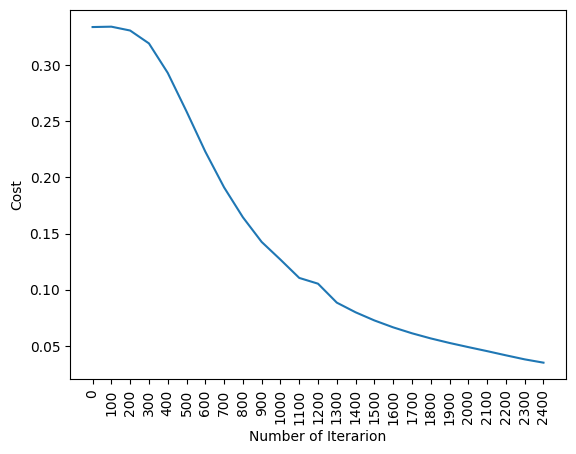

train accuracy: 100.0 %
test accuracy: 95.16129032258064 %


In [ ]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

<font color='purple'>
Up to this point we create 2 layer neural network and learn how to implement
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model

<br> Now lets learn how to implement L layer neural network with keras.

<a id="19"></a> <br>
# L Layer Neural Network
* **What happens if number of hidden layer increase:** Earlier layerls can detect simple features.
* When model composing simple features together in later layers of neural network that it can learn more and more complex functions. For example, lets look at our sign one.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* For example first hidden layer learns edges or basic shapes like line. When number of layer increase, layers start to learn more complex things like convex shapes or characteristic features like forefinger.
* Lets create our model
    * There are some hyperparameters we need to choose like learning rate, number of iterations, number of hidden layer, number of hidden units, type of activation functions. Woww it is too much :)
    * These hyperparameters can be chosen intiutively if you spend a lot of time in deep learning world.
    * However, if you do not spend too much time, the best way is to google it but it is not necessary. You need to try hyperparameters to find best one.
    * In this tutorial our model will have 2 hidden layer with 8 and4 nodes, respectively. Because when number of hidden layer and node increase, it takes too much time.
    * As a activation function we will use relu(first hidden layer), relu(second hidden layer) and sigmoid(output layer) respectively.
    * Number of iteration will be 100.
* Our way is same with previous parts however as you learn the logic behind deep learning, we can ease our job and use keras library for deeper neural networks.
* First lets reshape our x_train, x_test, y_train and y_test.

    
    

In [ ]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

<a id="22"></a> <br>
## Implementing with keras library
Lets look at some parameters of keras library:
* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is number of pixels in our images (4096 px)
* optimizer: we use adam optimizer
    * Adam is one of the most effective optimization algorithms for training neural networks.
    * Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters
* loss: Cost function is same. By the way the name of the cost function is cross-entropy cost function that we use previous parts.
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$
* metrics: it is accuracy.
* cross_val_score: use cross validation. If you do not know cross validation please chech it from my machine learning tutorial. https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* epochs: number of iteration

In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

<a id="23"></a> <br>
## Artificial Neural Network with Pytorch library.
* Pytorch is one of the frame works like keras.
* It eases implementing and constructing deep learning blocks.  
* Artificial Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="24"></a> <br>
## Convolutional Neural Network with Pytorch library.
* Pytorch is one of the frame works like keras.
* It eases implementing and constructing deep learning blocks.  
* Convolutional Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="25"></a> <br>
## Recurrent Neural Network with Pytorch library.
* Pytorch is one of the frame works like keras.
* It eases implementing and constructing deep learning blocks.  
* Recurrent Neural Network: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch

<a id="20"></a> <br>
# Conclusion
* First of all thanks for this data set.
* If you see my wrong spelling (it can be so much) please ignore them :)
* This tutorial is shallow, if you want more detail about some concepts you can comment.
* If you think that I cannot explain some concepts please learn it from youtube(especially Andrew) and then continue.
* If you do not understand some thing that is related with python or machine learning please check my other tutorials
    * Data Science: https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
    * Machine learning: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* Now I hope you understand and learn what is deep learning. However, we do not write long codes for each time to build deep learning model. Therefore, there are a deep learning frame works to build deep learning models fast and easy.
    * Artificial Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * Convolutional Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * Recurrent Neural Network: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
     

### <br> If you like it, please upvote :)
## <br> If you have any question, I will be appreciate to hear it.
